## 1. Data Wrangling, I
Perform the following operations using Python on any open source dataset (e.g., data.csv)
1. Import all the required Python Libraries.
2. Locate open source data from the web (e.g., https://www.kaggle.com). Provide a clear 
description of the data and its source (i.e., URL of the web site).
3. Load the Dataset into pandas dataframe.
4. Data Preprocessing: check for missing values in the data using pandas isnull(), describe() 
function to get some initial statistics. Provide variable descriptions. Types of variables etc. 
Check the dimensions of the data frame.
5. Data Formatting and Data Normalization: Summarize the types of variables by checking the 
data types (i.e., character, numeric, integer, factor, and logical) of the variables in the data set. 
If variables are not in the correct data type, apply proper type conversions.
6. Turn categorical variables into quantitative variables in Python.


In addition to the codes and outputs, explain every operation that you do in the above steps and explain 
everything that you do to import/read/scrape the data set.

In [57]:
# 1. Import all the required Python libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Load the dataset into a Pandas dataframe.
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

print("_____________________________________________________________________")

# 4. Check for missing values in the data.

print(df.isnull().sum())
print(df.describe())

# Provide variable descriptions.

print("_____________________________________________________________________")
print(df.columns)
print(df.shape)

# 5. Summarize the types of variables.

print("_____________________________________________________________________")
print(df.dtypes)

# One-hot encode the 'Sex' column
df = pd.get_dummies(df, columns=['Sex'])

# One-hot encode the 'Embarked' column
df = pd.get_dummies(df, columns=['Embarked'])

# Print the first few rows of the DataFrame
print("_____________________________________________________________________")
print(df.head())

_____________________________________________________________________
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000

## 2) Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using 
Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or 
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques 
to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this 
transformation should be one of the following reasons: to change the scale for better 
understanding of the variable, to convert a non-linear relation into a linear one, or to decrease 
the skewness and convert the distribution into a normal distribution

In [78]:
import pandas as pd
import numpy as np

# Create a small dataset with null values and outliers
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Emily', 'Frank', 'George', 'Hannah', 'Isabella', 'Jack', 'Hrushikesh'],
        'Age': [25, 30, np.nan, 40, 50, 55, 60, 65, np.nan, 75, 2300],
        'Grade': [85, 90, 95, 100, 105, 110, 120, np.nan, 135, 140, 2000]}
df = pd.DataFrame(data)

# Scan all variables for missing values and inconsistencies
print(df.isnull().sum())  # Check for null values
df['Age'].fillna(df['Age'].mean(), inplace=True)  # Replace null values with mean age
print(df)  # Check for inconsistencies
print("___________________________________________________________________")

# Scan all numeric variables for outliers
q1 = df['Grade'].quantile(0.25)
q3 = df['Grade'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['Grade'] > lower_bound) & (df['Grade'] < upper_bound)]  # Remove outliers
print(f"Upper Bound: {upper_bound}")
print(f"Lower Bound: {lower_bound}")
print("___________________________________________________________________")

# Apply data transformations on at least one of the variables
df['Grade_sqrt'] = np.sqrt(df['Grade'])  # Apply square root transformation to Grade variable

print(df)  # Print final dataset

Name     0
Age      2
Grade    1
dtype: int64
          Name     Age   Grade
0        Alice    25.0    85.0
1          Bob    30.0    90.0
2      Charlie   300.0    95.0
3        David    40.0   100.0
4        Emily    50.0   105.0
5        Frank    55.0   110.0
6       George    60.0   120.0
7       Hannah    65.0     NaN
8     Isabella   300.0   135.0
9         Jack    75.0   140.0
10  Hrushikesh  2300.0  2000.0
___________________________________________________________________
Upper Bound: 183.75
Lower Bound: 43.75
___________________________________________________________________
       Name    Age  Grade  Grade_sqrt
0     Alice   25.0   85.0    9.219544
1       Bob   30.0   90.0    9.486833
2   Charlie  300.0   95.0    9.746794
3     David   40.0  100.0   10.000000
4     Emily   50.0  105.0   10.246951
5     Frank   55.0  110.0   10.488088
6    George   60.0  120.0   10.954451
8  Isabella  300.0  135.0   11.618950
9      Jack   75.0  140.0   11.832160


## 3) Descriptive Statistics - Measures of Central Tendency and variability
Perform the following operations on any open source dataset (e.g., data.csv)
1. Provide summary statistics (mean, median, minimum, maximum, standard deviation) for a dataset (age, income etc.) with numeric variables grouped by one of the qualitative 
(categorical) variable. For example, if your categorical variable is age groups and quantitative 
variable is income, then provide summary statistics of income grouped by the age groups. 
Create a list that contains a numeric value for each response to the categorical variable.
2. Write a Python program to display some basic statistical details like percentile, mean, 
standard deviation etc. of the species of ‘Iris-setosa’, ‘Iris-versicolor’ and ‘Iris-versicolor’ of 
iris.csv dataset.
Provide the codes with outputs and explain everything that you do in this step.

In [79]:
import pandas as pd

# create a sample dataset
data = {'age': [25, 30, 35, 40, 45, 50, 55, 60],
        'income': [50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000],
        'gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F']}
df = pd.DataFrame(data)

# calculate summary statistics grouped by gender
summary = df.groupby('gender').agg(['mean', 'median', 'min', 'max', 'std'])['income']

# create a list of numeric values for each response to the categorical variable
categories = df['gender'].unique().tolist()

# print the summary statistics and the list of categories
print(summary)
print(categories)


           mean   median    min     max           std
gender                                               
F       90000.0  90000.0  60000  120000  25819.888975
M       80000.0  80000.0  50000  110000  25819.888975
['M', 'F']


In [65]:
# Q2
import pandas as pd

# Read the dataset
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris-data.csv')

# Group the data by the species column and calculate summary statistics for each group
summary_stats = df.groupby('class').describe()

# Print the summary statistics for the Iris setosa species
print(summary_stats.loc['Iris-setosa'])
print("____________________________________________________________________")

# Print the summary statistics for the Iris versicolor species
print(summary_stats.loc['Iris-versicolor'])
print("____________________________________________________________________")

# Print the summary statistics for the Iris virginica species
print(summary_stats.loc['Iris-virginica'])
print("____________________________________________________________________")


sepal length  count    50.000000
              mean      5.006000
              std       0.352490
              min       4.300000
              25%       4.800000
              50%       5.000000
              75%       5.200000
              max       5.800000
sepal width   count    50.000000
              mean      3.418000
              std       0.381024
              min       2.300000
              25%       3.125000
              50%       3.400000
              75%       3.675000
              max       4.400000
petal length  count    50.000000
              mean      1.464000
              std       0.173511
              min       1.000000
              25%       1.400000
              50%       1.500000
              75%       1.575000
              max       1.900000
petal width   count    50.000000
              mean      0.244000
              std       0.107210
              min       0.100000
              25%       0.200000
              50%       0.200000
          

## 4) Data Analytics I
Create a Linear Regression Model using Python/R to predict home prices using Boston Housing 
Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains 
information about various houses in Boston through different parameters. There are 506 samples and 
14 feature variables in this dataset.
The objective is to predict the value of prices of the house using the given features

In [74]:
import numpy as np
import pandas as pd  
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

boston = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")

X = boston.drop('medv',axis=1)
Y = boston['medv']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

regressor = LinearRegression()
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test,y_pred)
print("Mean Square Error : ", mse)
print("Mean Absolute Error : ", mae)

Mean Square Error :  20.869292183770686
Mean Absolute Error :  3.2132704958423735


## 5) Data Analytics II
1. Implement logistic regression using Python/R to perform classification on 
Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall
on the given dataset.


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

dataset = pd.read_csv("https://raw.githubusercontent.com/shivang98/Social-Network-ads-Boost/master/Social_Network_Ads.csv")

x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
  
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=0)

sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)
  
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

y_pred = classifier.predict(xtest)
cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix : \n", cm)

print ("Accuracy : ", accuracy_score(ytest, y_pred))

Confusion Matrix : 
 [[65  3]
 [ 8 24]]
Accuracy :  0.89


## 6) Data Analytics III
1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on 
the given dataset.


In [73]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

iris=pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris-data.csv')

X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values

le = LabelEncoder()
y = le.fit_transform(y)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


## 7) Text Analytics
1. Extract Sample document and apply following document preprocessing methods: 
Tokenization, POS Tagging, stop words removal, Stemming and Lemmatization.
2. Create representation of documents by calculating Term Frequency and Inverse 
DocumentFrequency.

In [91]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

# 1. Extract Sample document and apply following document preprocessing methods: Tokenization, POS Tagging, stop words removal, Stemming and Lemmatization.

text = "The quick brown fox jumps over the lazy dog."

# Tokenization
tokens = word_tokenize(text)
print("Tokens:", tokens)

# POS Tagging
pos_tags = pos_tag(tokens)
print("POS Tags:", pos_tags)

# Stop Words Removal
stop_words = set(stopwords.words('english'))
tokens_without_stop_words = [token for token in tokens if token not in stop_words]
print("Tokens without Stop Words:", tokens_without_stop_words)

# Stemming
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(token) for token in tokens]
print("Stemmed Tokens:", stemmed_tokens)

# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
print("Lemmatized Tokens:", lemmatized_tokens)

# 2. Create representation of documents by calculating Term Frequency and Inverse DocumentFrequency.

documents = ["This is the first document.", 
             "This document is the second document.", 
             "And this is the third one.", 
             "Is this the first document?"]

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Compute the TF-IDF scores
tfidf_scores = vectorizer.fit_transform(documents)

# Print the TF-IDF scores
print(tfidf_scores)


Tokens: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.']
POS Tags: [('The', 'DT'), ('quick', 'JJ'), ('brown', 'NN'), ('fox', 'NN'), ('jumps', 'VBZ'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NN'), ('.', '.')]
Tokens without Stop Words: ['The', 'quick', 'brown', 'fox', 'jumps', 'lazy', 'dog', '.']
Stemmed Tokens: ['the', 'quick', 'brown', 'fox', 'jump', 'over', 'the', 'lazi', 'dog', '.']
Lemmatized Tokens: ['The', 'quick', 'brown', 'fox', 'jump', 'over', 'the', 'lazy', 'dog', '.']
  (0, 1)	0.46979138557992045
  (0, 2)	0.5802858236844359
  (0, 6)	0.38408524091481483
  (0, 3)	0.38408524091481483
  (0, 8)	0.38408524091481483
  (1, 5)	0.5386476208856763
  (1, 1)	0.6876235979836938
  (1, 6)	0.281088674033753
  (1, 3)	0.281088674033753
  (1, 8)	0.281088674033753
  (2, 4)	0.511848512707169
  (2, 7)	0.511848512707169
  (2, 0)	0.511848512707169
  (2, 6)	0.267103787642168
  (2, 3)	0.267103787642168
  (2, 8)	0.267103787642168
  (3, 1)	0.46979138557992045


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 8) Data Visualization I
1. Use the inbuilt dataset 'titanic'. The dataset contains 891 rows and contains information about 
the passengers who boarded the unfortunate Titanic ship. Use the Seaborn library to see if we 
can find any patterns in the data.
2. Write a code to check how the price of the ticket (column name: 'fare') for each passenger
is distributed by plotting a histogram.

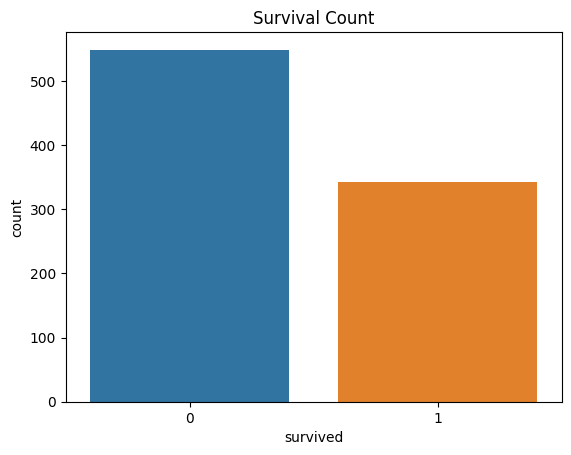

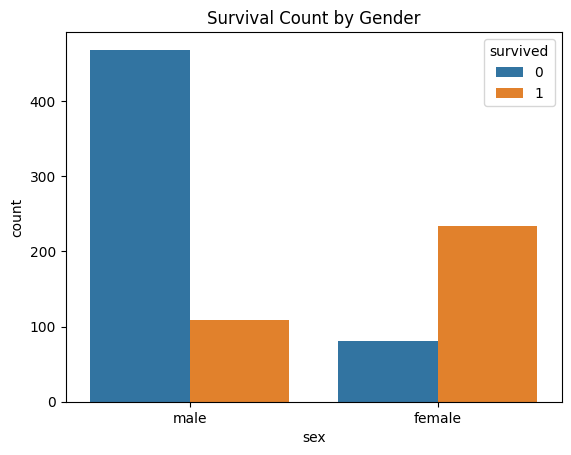

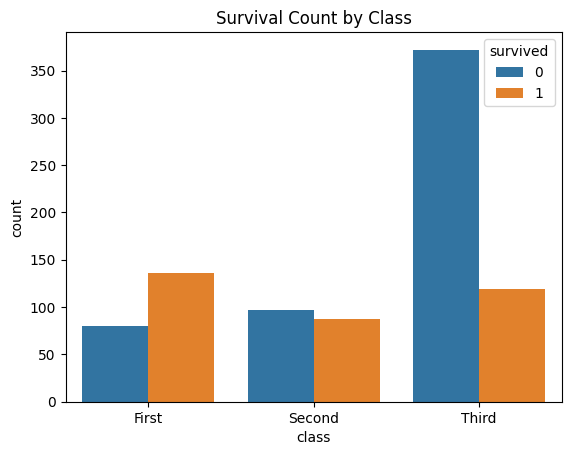

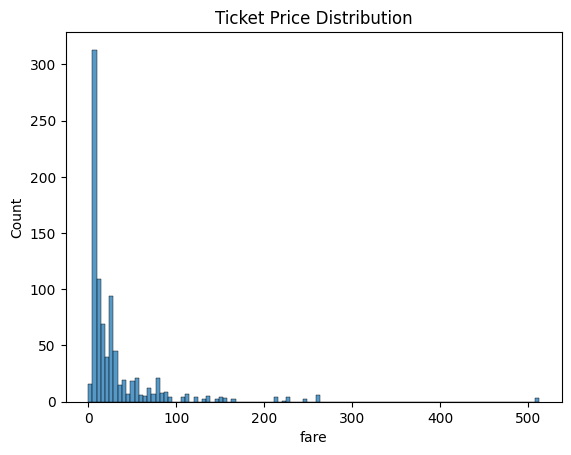

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the 'titanic' dataset
titanic_data = sns.load_dataset('titanic')

# Use Seaborn's visualization functions to explore the data
sns.countplot(x='survived', data=titanic_data)
plt.title('Survival Count')
plt.show()

sns.countplot(x='sex', hue='survived', data=titanic_data)
plt.title('Survival Count by Gender')
plt.show()

sns.countplot(x='class', hue='survived', data=titanic_data)
plt.title('Survival Count by Class')
plt.show()

# Q2 Write a code to check how the price of the ticket (column name: 'fare') for each passenger is distributed by plotting a histogram.
sns.histplot(x='fare', data=titanic_data)
plt.title('Ticket Price Distribution')
plt.show()

## 9) Data Visualization II
1. Use the inbuilt dataset 'titanic' as used in the above problem. Plot a box plot for distribution of 
age with respect to each gender along with the information about whether they survived or 
not. (Column names : 'sex' and 'age')
2. Write observations on the inference from the above statistics

<Axes: xlabel='sex', ylabel='age'>

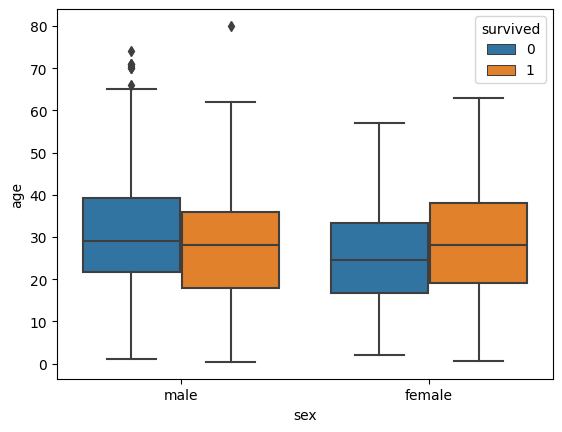

In [87]:
import seaborn as sns

# Load the titanic dataset
titanic = sns.load_dataset('titanic')

# Plot the box plot
sns.boxplot(x='sex', y='age', hue='survived', data=titanic)

# ---------------------------------------------------------------------

# Q2

# Observations:
# 1. The median age of females who survived is slightly lower than that of males who survived.
# 2. The age distribution of females who survived is more spread out than that of males who survived.
# 3. The age distribution of females who did not survive is more spread out than that of males who did not survive.
# 4. The median age of males who did not survive is slightly lower than that of females who did not survive.

# The box plot provides information about the distribution of age for each gender along with the survival status (whether they survived or not) on the same plot.
# The box represents the interquartile range (IQR), indicating the middle 50% of the data. The line inside the box represents the median age.
# The whiskers extend from the boxes and show the range of the data, excluding any outliers.
# Outliers are shown as individual points outside the whiskers.
# In the plot, we can observe the age distribution for males and females separately, differentiated by the color of the box and whiskers.
# We can also compare the age distribution of those who survived (indicated by the blue color) and those who did not survive (indicated by the orange color) within each gender group.
# From the plot, we can make observations such as the median age and the spread of ages within each gender and survival category.
# We can also compare the overall age distribution between males and females and identify any noticeable differences.

## 10) Data Visualization III
Download the Iris flower dataset or any other dataset into a DataFrame. (e.g., 
https://archive.ics.uci.edu/ml/datasets/Iris ). Scan the dataset and give the inference as:
1. List down the features and their types (e.g., numeric, nominal) available in the dataset.
2. Create a histogram for each feature in the dataset to illustrate the feature distributions.
3. Create a boxplot for each feature in the dataset.
4. Compare distributions and identify outliers.

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object


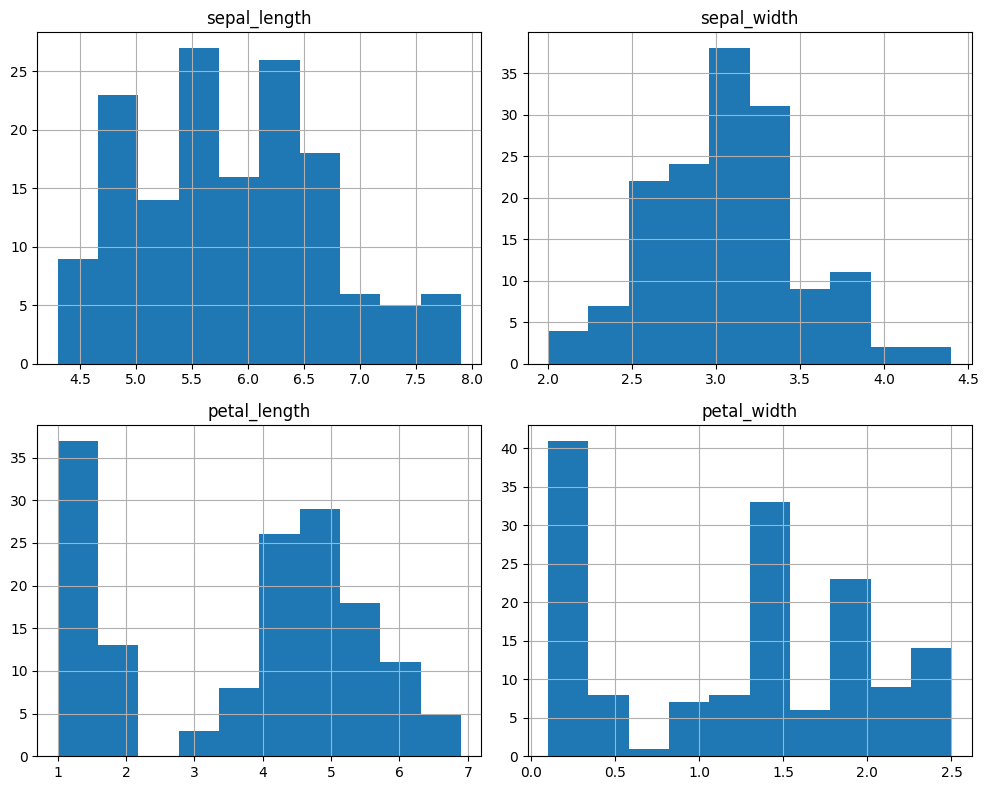

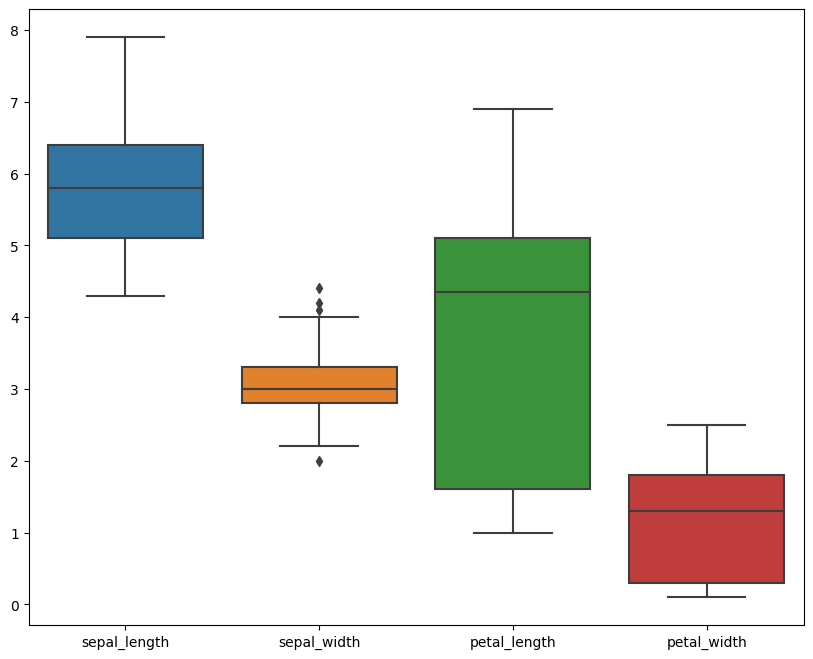

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning:

Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.



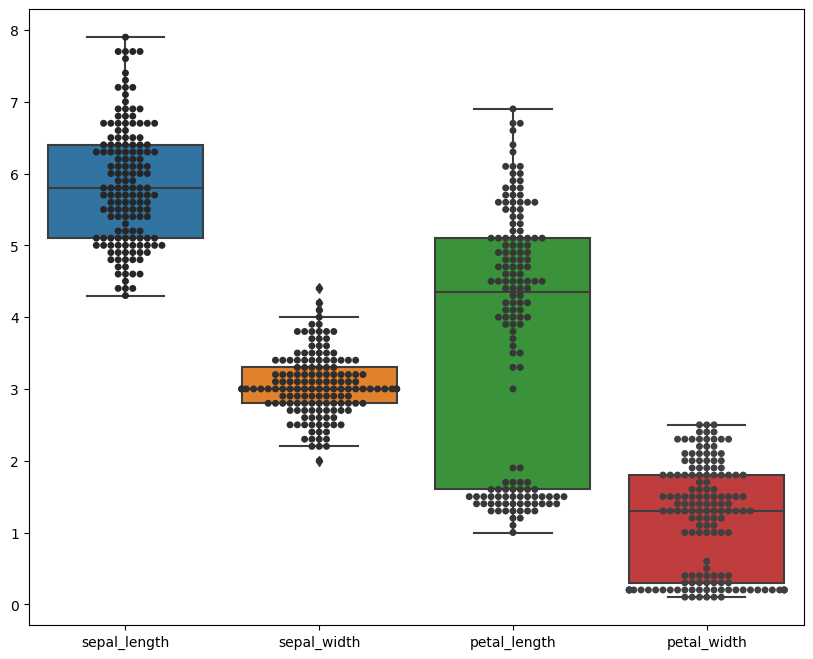

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a DataFrame
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_df = pd.read_csv(url, names=column_names)

# 1. List down the features and their types
feature_types = iris_df.dtypes
print(feature_types)

# 2. Create a histogram for each feature
iris_df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# 3. Create a boxplot for each feature
plt.figure(figsize=(10, 8))
sns.boxplot(data=iris_df)
plt.show()

# 4. Compare distributions and identify outliers
plt.figure(figsize=(10, 8))
sns.boxplot(data=iris_df)
sns.swarmplot(data=iris_df, color=".25")
plt.show()


# 1.Create databases and tables, insert small amounts of data, and run simple queries using Impala